# Heart-Disease-Classification-Using-Machine-Learning

### Import the library
pip install -r requirements.txt

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Read Data

In [3]:
# Reading data  and extract starting 5 rows using pandas
df = pd.read_csv("data.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Exploration

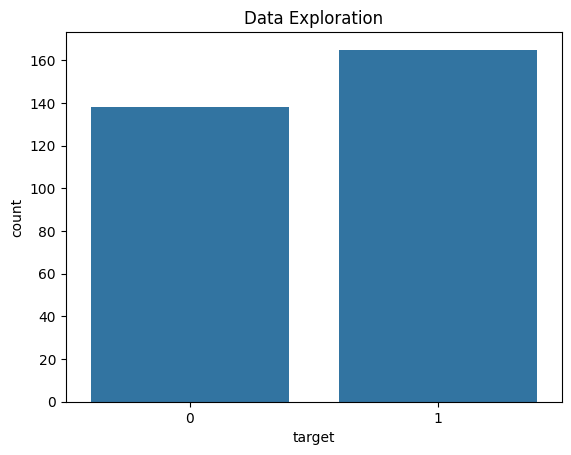

In [5]:
df.target.value_counts()
sns.countplot(x="target" , data=df)
plt.title("Data Exploration")
plt.show()

### Extracting No Disease And Have Disease

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


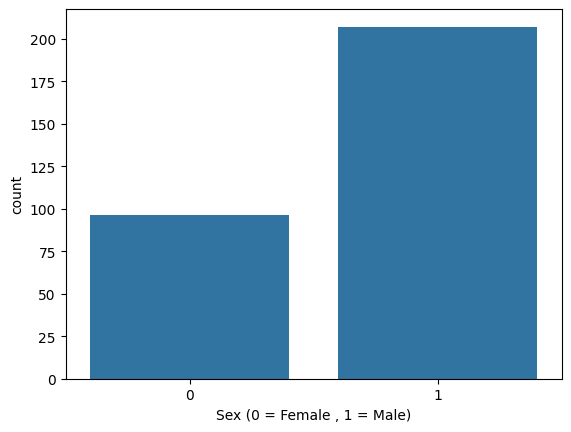

In [7]:
countnoDiseas = len(df[df.target == 0])
counthaveDiseas = len(df[df.target == 1])

print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countnoDiseas / len(df.target)) *100))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((counthaveDiseas / len(df.target)) *100))

# Ploting data into graph
sns.countplot(x='sex', data=df)
plt.xlabel("Sex (0 = Female , 1 = Male)")
plt.savefig('MALE_1_FEMALE_0.png')
plt.show()

### Grouping Data With target values

In [42]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


### Extracting Data Age & target 

In [127]:
age = pd.crosstab(df.age , df.target)
age.head()



target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2


### Heart Disease Frequency for Ages

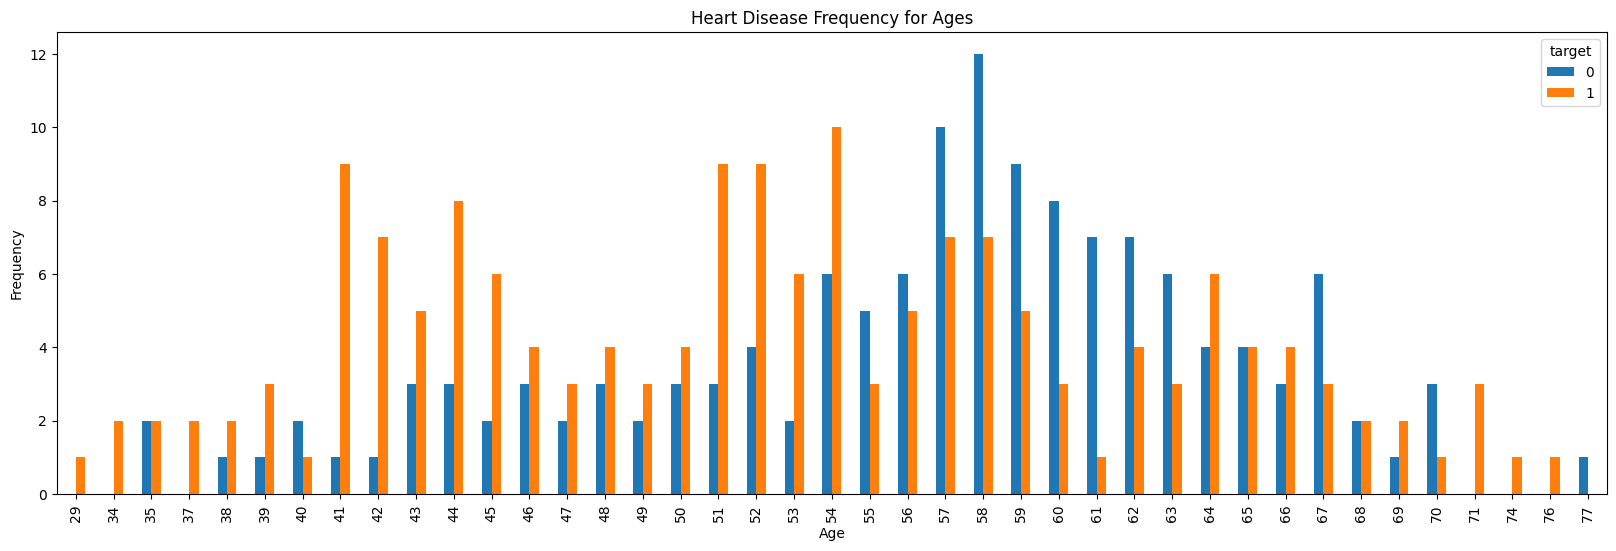

In [126]:
age.plot(kind='bar', figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heart_Disease_And_Ages.png')
plt.show()

### Heart Disease Frequency for Sex

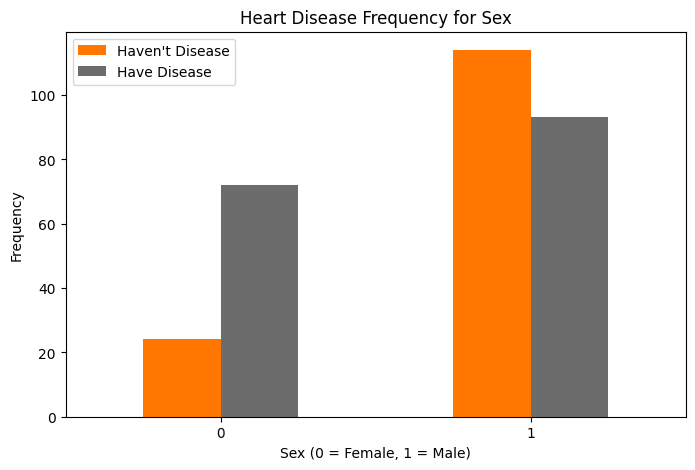

In [129]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(8,5),color=["#FF7700","#00000093" ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.xticks(rotation=1)
plt.ylabel('Frequency')
plt.savefig('heart_Disease_For_Sex.png')
plt.show()

### Maximum Heart Rate 

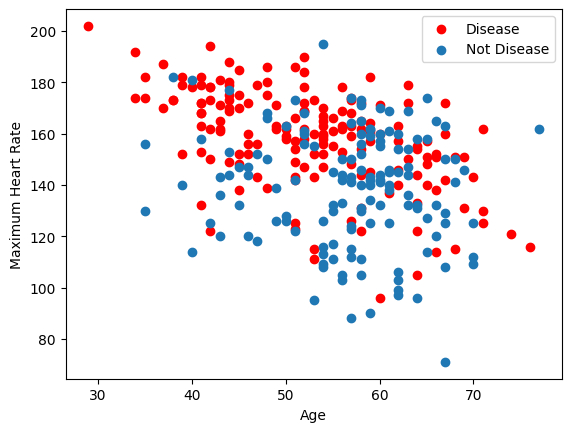

In [ ]:
plt.scatter(x=df.age[df.target == 1] , 
            y=df.thalach[(df.target==1)] , c="red")

plt.scatter(x=df.age[df.target == 0],
            y=df.thalach[(df.target == 0)])

plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.savefig('Maximum_heart_rate.png')
plt.show()


### Heart Disease Frequency for Slope

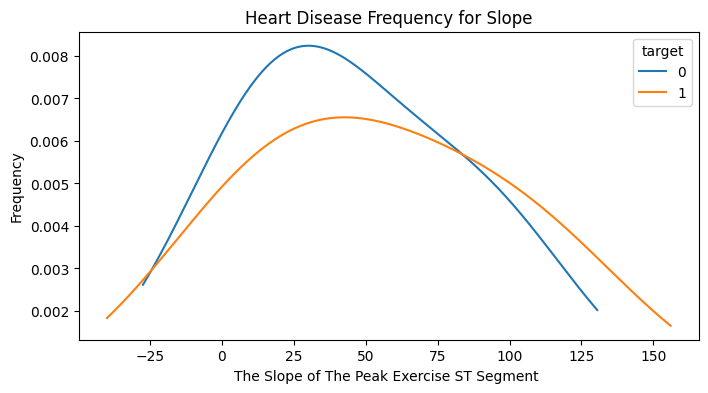

In [134]:
pd.crosstab(df.slope , df.target).plot(kind='density' , figsize=(8,4))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.savefig('Heart_Disease_Frequency_For_Slope.png')
plt.show()

### Heart Disease Frequency for Slope

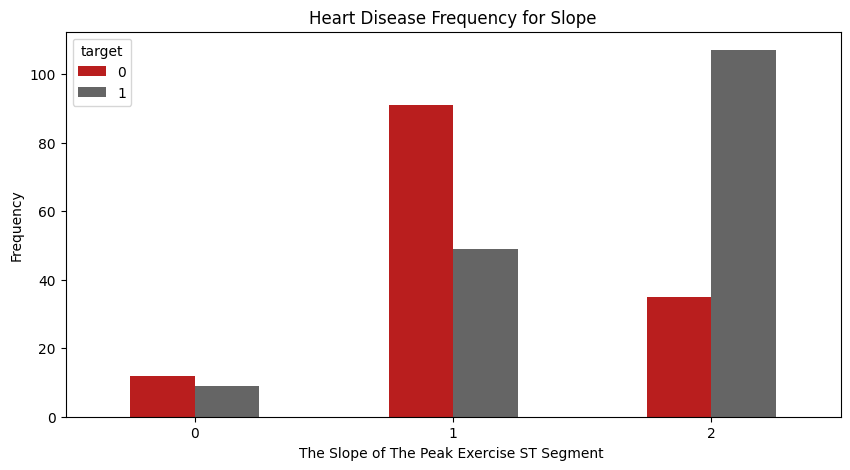

In [130]:
pd.crosstab(df.slope , df.target).plot(kind='bar' , figsize=(10,5) , color=["#B91E1E","#656565FF" ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.savefig('Heart_Disease_Frequency_segment.png')
plt.show()


### Heart Disease Frequency According To FBS

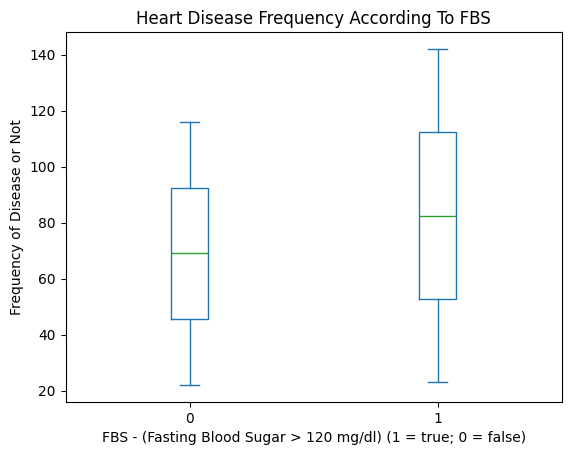

In [132]:
pd.crosstab(df.fbs , df.target).plot(kind='box')
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
#plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.savefig('Heart_Disease_Frequency_According _To_FBS.png')
plt.show()

### Heart Disease Frequency According To Chest Pain Type

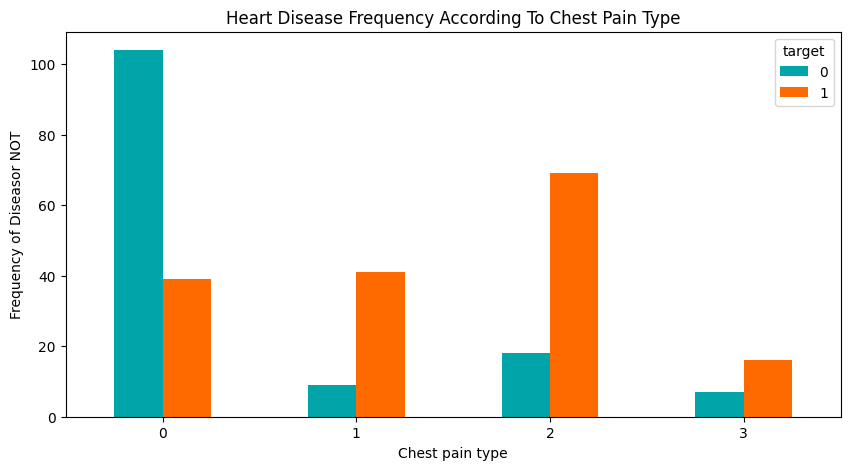

In [ ]:
pd.crosstab(df.cp , df.target).plot(kind="bar" , figsize=(10,5) , color=["#00A4A9","#FF6A00" ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel("Chest pain type")
plt.xticks(rotation = 0)
plt.ylabel("Frequency of Diseasor NOT")
plt.savefig("Frequency_of_Diseasor_NOT.png")
plt.show()

### Creating Dummy variables
Since 'cp', 'thal' and 'slope' are categorical variables we'll turn them into dummy variables.



In [13]:
a = pd.get_dummies(df['cp'] , prefix="cp")
b= pd.get_dummies(df['thal'] , prefix="thal")
c = pd.get_dummies(df['slope'] , prefix="slope")

frame  = [df , a , b , c]
df = pd.concat(frame , axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,False,False,True,False,True,False,False,True,False,False
1,37,1,2,130,250,0,1,187,0,3.5,...,False,True,False,False,False,True,False,True,False,False
2,41,0,1,130,204,0,0,172,0,1.4,...,True,False,False,False,False,True,False,False,False,True
3,56,1,1,120,236,0,1,178,0,0.8,...,True,False,False,False,False,True,False,False,False,True
4,57,0,0,120,354,0,1,163,1,0.6,...,False,False,False,False,False,True,False,False,False,True
